In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
#importing the dependencies
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models




In [3]:
#data curation
#upload the json file


In [4]:
!pip install kaggle

In [5]:
kaggle_credentails = json.load(open("kaggle.json"))

In [6]:
#set kaggle API
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [7]:
dataset_path = r"C:\Users\user\Desktop\PROJECT FINAL\plantvillage-dataset.zip"

In [8]:
#unZip the dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
      zip_ref.extractall()

In [9]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [10]:
print(len(os.listdir(r"C:\Users\user\Desktop\plant disease detection")))
print(os.listdir(r"C:\Users\user\Desktop\plant disease detection")[:5])

23
['.vscode', 'archive.zip', 'assets', 'class_indices.json', 'fingerprint.pb']


In [11]:
#dataset path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


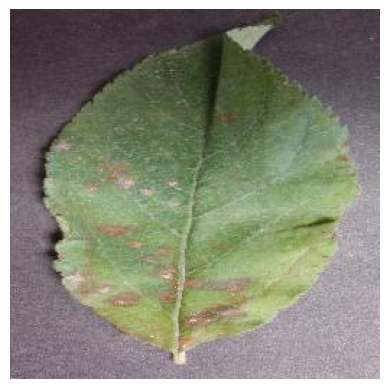

In [12]:
image_path = 'plantvillage dataset/color/Apple___Cedar_apple_rust/fa148283-75ee-4806-8282-63662a2e05c1___FREC_C.Rust 4416.JPG'

#read the image
img = mpimg.imread(image_path)

print(img.shape)
#display the image
plt.imshow(img)
plt.axis('off') #turn off axis numbers
plt.show()

In [13]:
#image parameters
img_size = 224
batch_size = 32

In [14]:
#image data generator
daat_gen = ImageDataGenerator(
      rescale=1./255,
      validation_split = 0.2  #use 20% data for validation
)

In [15]:
#train generator

train_generator = daat_gen.flow_from_directory(
      base_dir,
      target_size=(img_size, img_size),
      batch_size=batch_size,
      subset='training',
      class_mode='categorical'

)

Found 43456 images belonging to 38 classes.


In [16]:
#validation generator
validation_generator = daat_gen.flow_from_directory(
      base_dir,
      target_size=(img_size, img_size),
      batch_size=batch_size,
      subset='validation',
      class_mode='categorical'

)

Found 10849 images belonging to 38 classes.


In [17]:
#model definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3),activation='relu',input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [18]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [19]:
#compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
#training the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size, #number of steps per epoch
      epochs=5, #number of epochs
      validation_data = validation_generator,
      validation_steps = validation_generator.samples // batch_size  #validation steps
)

Epoch 1/5


1358/1358 [==============================] - 2977s 2s/step - loss: 0.9674 - accuracy: 0.7352 - val_loss: 0.4742 - val_accuracy: 0.8444
Epoch 2/5
1358/1358 [==============================] - 2612s 2s/step - loss: 0.2742 - accuracy: 0.9129 - val_loss: 0.3868 - val_accuracy: 0.8788
Epoch 3/5
1358/1358 [==============================] - 2614s 2s/step - loss: 0.1253 - accuracy: 0.9586 - val_loss: 0.5037 - val_accuracy: 0.8701
Epoch 4/5
1358/1358 [==============================] - 2599s 2s/step - loss: 0.0962 - accuracy: 0.9685 - val_loss: 0.4984 - val_accuracy: 0.8743
Epoch 5/5
1358/1358 [==============================] - 2564s 2s/step - loss: 0.0668 - accuracy: 0.9788 - val_loss: 0.6306 - val_accuracy: 0.8580


In [21]:
#epoch = how many batches i have added

In [22]:
#model evaluation
print("Evaluarting model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy : {val_accuracy * 100:.2f}%")

Evaluarting model...
339/339 [==============================] - 107s 314ms/step - loss: 0.6306 - accuracy: 0.8580
Validation Accuracy : 85.80%


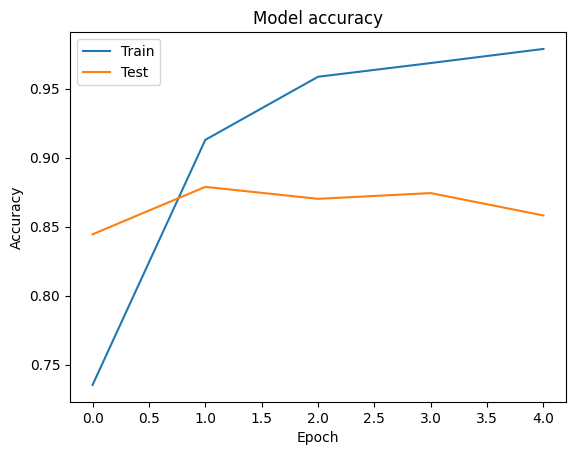

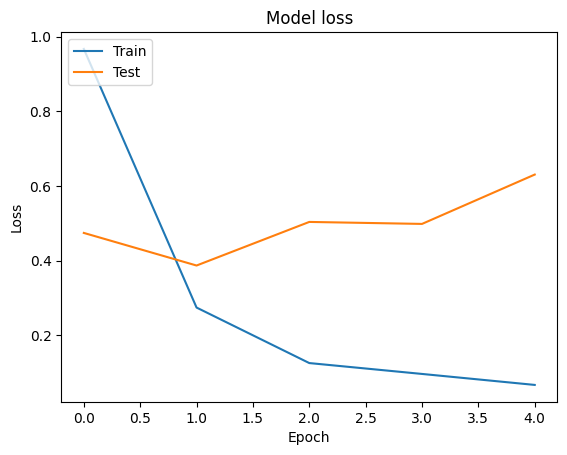

In [23]:
#plot training and validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training and validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
#function to load and preprocess the image using pillow
def  load_and_preprocess_image(image_path, traget_size=(224, 224)):
      #load the image
      img = Image.open(image_path)
      #resize the image
      img = img.resize(traget_size)
      #convert the image to a numpy array
      img_array = np.array(img)
      #add batch dimention
      img_array = np.expand_dims(img_array, axis=0)
      #scale the image value to [0,1]
      img_array = img_array.astype('float32') / 255.
      return img_array

#function to predict the class of an image

def predict_image_class(model, image_path, class_indices):
      preprocessed_image = load_and_preprocess_image(image_path)
      predictions = model.predict(preprocessed_image)
      predicted_class_index = np.argmax(predictions, axis=1)[0]
      predicted_class_name = class_indices[predicted_class_index]
      return predicted_class_name

In [25]:
#create  a mapping from class indices to class name
class_indices = {v:k for k,v in train_generator.class_indices.items()}

In [26]:
class_indices


{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [27]:
#saving the class name as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [39]:
#example usages
image_path = 'test10.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

#output of the result
print("Predicted class name:", predicted_class_name)

1/1 [==============================] - 0s 63ms/step
Predicted class name: Raspberry___healthy


In [30]:
model.save(r'C:\Users\user\Desktop\PROJECT FINAL')

INFO:tensorflow:Assets written to: C:\Users\user\Desktop\PROJECT FINAL\assets


INFO:tensorflow:Assets written to: C:\Users\user\Desktop\PROJECT FINAL\assets


In [31]:
# Save the trained model if not already saved
model.save("model.h5")
print("Model saved as 'model.h5'")


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as 'model.h5'


In [32]:
# Import required libraries for Flask app
from flask import Flask, request, jsonify
import io
from PIL import Image

# Load the saved model
model = tf.keras.models.load_model("plant_disease_model.h5")

# Extract class labels from train_generator
class_labels = list(train_generator.class_indices.keys())

# Define image preprocessing
def preprocess_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes)).convert("RGB")
    img = img.resize((224, 224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Define prediction function
def predict(image_bytes):
    processed = preprocess_image(image_bytes)
    preds = model.predict(processed)
    class_index = np.argmax(preds)
    return class_labels[class_index]
